In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

%matplotlib inline

In [26]:
df = pd.read_csv('../datasets/base_data.csv')
df.columns

Index(['Unnamed: 0', 'companion', 'gold_left', 'last_round', 'level',
       'placement', 'players_eliminated', 'puuid', 'time_eliminated',
       'total_damage_to_players',
       ...
       'Warden_1', 'Warden_2', 'Warden_3', 'Wind_0', 'Wind_1', 'Wind_2',
       'Wind_3', 'Woodland_0', 'Woodland_1', 'Woodland_2'],
      dtype='object', length=247)

In [29]:
# A:
df = pd.DataFrame(df, columns=['placement','Berserker_0', 'Shadow_0'])
df.sum()

placement      44280
Berserker_0     4199
Shadow_0        3962
dtype: int64

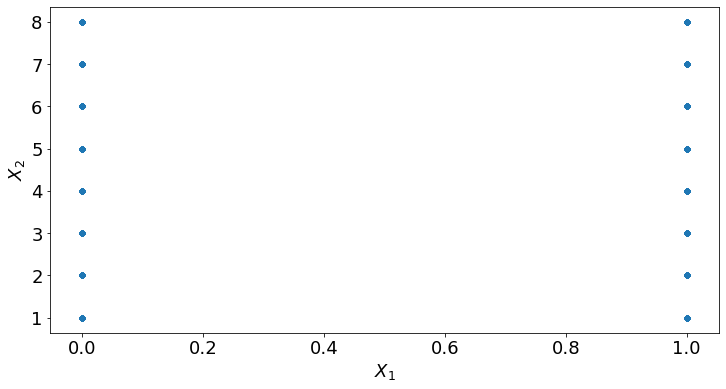

In [32]:
#Plotting the scatterplot
ax = df.plot(kind="scatter", x="Berserker_0", y='placement', figsize=(12,6), s=20)
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$X_2$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [33]:
# Let's prepare our X matrix
X = df.loc[:, ['Berserker_0', 'placement']]

In [40]:
# A:
# I do: Fit a k-means clustering model
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [41]:
# Check out centroids
km.cluster_centers_

array([[0.45582656, 2.        ],
       [0.42276423, 7.5       ],
       [0.400271  , 5.        ]])

In [42]:
# Option 1: Class attribute
km.labels_

array([2, 2, 0, ..., 2, 2, 0])

In [43]:
# Option 2: Predict
km.predict(X)

array([2, 2, 0, ..., 2, 2, 0])


Assign clusters assignments (predictions) back to the original dataframe

In [44]:

# A: 
# attach predicted cluster to original points
df['cluster'] = km.labels_
df.head()

,placement,Berserker_0,Shadow_0,cluster
0,4,0,0,2
1,6,0,0,2
2,3,0,1,0
3,7,0,1,1
4,5,0,1,2


In [45]:
## Create a dataframe for cluster_centers (centroids)
centroids = pd.DataFrame(
    km.cluster_centers_,
    columns=["Berserker_0", "placement"]
)
centroids

,Berserker_0,placement
0,0.455827,2.0
1,0.422764,7.5
2,0.400271,5.0


Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot¶
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

<Figure size 504x504 with 0 Axes>

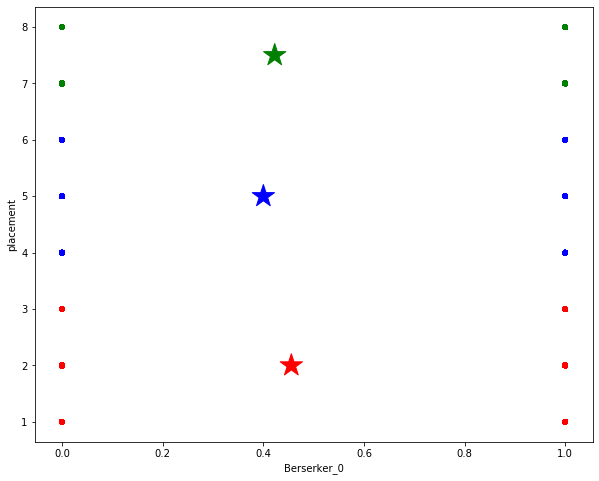

In [46]:

# A:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Berserker_0", y="placement",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="Berserker_0", y="placement", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [47]:

# A:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [48]:
km_sc = KMeans(n_clusters=3, random_state=42)
km_sc.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [49]:
df['cluster_sc'] = km_sc.labels_
df.head()

,placement,Berserker_0,Shadow_0,cluster,color,cluster_sc
0,4,0,0,2,blue,2
1,6,0,0,2,blue,0
2,3,0,1,0,red,2
3,7,0,1,1,green,0
4,5,0,1,2,blue,0


In [50]:
centroids = pd.DataFrame(
    sc.inverse_transform(km_sc.cluster_centers_),
    columns=["Berserker_0", "placement"]
)

<Figure size 504x504 with 0 Axes>

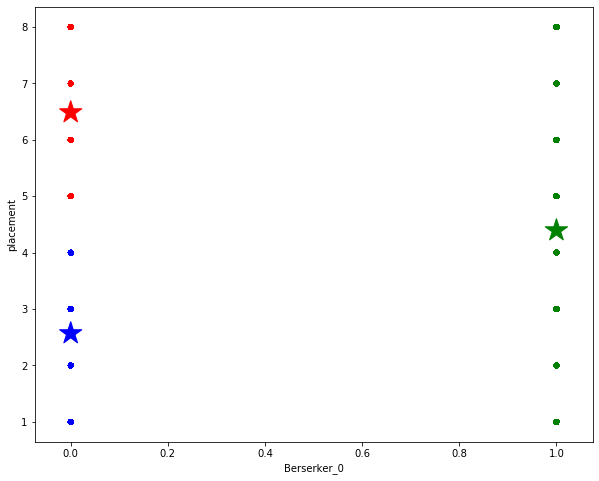

In [51]:
# A:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['cluster_sc'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Berserker_0", y="placement",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="Berserker_0", y="placement", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

In [52]:
# A: 
silhouette_score(X, km.labels_)

0.5476381093958088